
-Summary of Churn Prediction Model Development.

-Preparing data, validation framework, feature importance.

-Insights on customer churn and variables.

-Measuring variable importance, encoding, and classification.

-Logistic regression explained with interpretation tips.

In [196]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [197]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [199]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [200]:
df.dtypes[df.dtypes == object]

customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object

In [201]:
df.columns = df.columns.str.lower().str.replace(' ','_')

categorical = df.dtypes[df.dtypes == object].index
for col in categorical:
  df[col] = df[col].str.lower().str.replace(' ','_')


In [202]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges.fillna(0, inplace=True)


/tmp/ipykernel_12134/1401066435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.totalcharges.fillna(0, inplace=True)


In [203]:
df.churn = (df.churn == 'yes').astype(int)

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [206]:
X_train_full,X_test,y_train_full,y_test = train_test_split(df,df.churn,test_size=0.2,random_state=2)

In [207]:
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25,random_state=2)

In [208]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape , X_test.shape, y_test.shape

((4225, 21), (4225,), (1409, 21), (1409,), (1409, 21), (1409,))

In [209]:
del X_train['churn']
del X_val['churn']
del X_test['churn']



In [210]:
X_train.reset_index(drop=True)
X_val.reset_index(drop=True)
X_test.reset_index(drop=True)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7854-ektjl,female,0,no,yes,2,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,electronic_check,19.60,35.85
1,6473-uluht,male,0,yes,yes,16,yes,yes,dsl,yes,yes,no,yes,yes,yes,month-to-month,no,electronic_check,84.90,1398.25
2,0757-wcuuz,male,0,yes,yes,54,yes,yes,dsl,no,no,yes,no,no,yes,two_year,no,credit_card_(automatic),63.35,3409.10
3,9254-rbfon,female,0,yes,yes,17,yes,no,fiber_optic,no,no,yes,yes,yes,yes,one_year,no,bank_transfer_(automatic),98.60,1704.95
4,7407-sujiz,male,0,no,no,25,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,20.60,541.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,8845-lwkge,female,0,yes,yes,30,yes,no,dsl,no,no,yes,yes,yes,no,one_year,yes,electronic_check,64.50,1985.15
1405,1216-bgtsp,male,0,no,no,45,yes,yes,fiber_optic,yes,no,yes,yes,yes,yes,month-to-month,yes,credit_card_(automatic),108.45,4964.70
1406,0927-cngrh,male,0,no,yes,1,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,mailed_check,19.55,19.55
1407,6861-okbce,female,0,no,yes,11,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,credit_card_(automatic),20.10,221.35


In [211]:
y_train = y_train.values
y_val = y_val.values
y_test = y_test.values


In [212]:
X_train_full.reset_index(drop=True,inplace=True)

In [213]:
global_churn_rate= round(X_train_full.churn.mean(),2)
global_churn_rate

0.27

In [214]:
numerical = ['tenure','monthlycharges','totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [215]:
X_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [216]:
female_churn_rate = X_train_full[X_train_full.gender == 'female'].churn.mean()
female_churn_rate

0.2748475062791532

In [217]:
male_churn_rate = X_train_full[X_train_full.gender == 'male'].churn.mean()
male_churn_rate

0.2651914295749912

 so churn rate for male and female is the same

In [218]:
churn_partner = X_train_full[X_train_full.partner == 'yes'].churn.mean()
churn_partner

0.20294117647058824

In [219]:
churn_no_partner = X_train_full[X_train_full.partner == 'no'].churn.mean()
churn_no_partner

0.3325326012354152

In [220]:
global_churn_rate - churn_partner

0.06705882352941178

In [221]:
global_churn_rate - churn_no_partner

-0.06253260123541521

In [222]:
# less than 1 , means the group less likely to churn compared to the global
churn_partner / global_churn_rate

0.7516339869281046

In [223]:
# greater than 1 , means the group more likely to churn compared to the global
churn_no_partner / global_churn_rate

1.2316022267978342

the churn rate with having a partner is much lower than not having a partner

churn rate = no. of ones / n

In [224]:
from IPython.display import display

using the diff , risk for feature importance, diff = the churn rate for every group inside every feature - global churn rate , risk = churn_rate  / global
a much more a method for feature importance

we are looking for every value inside every variable , but instead we need a value to indicate the whole variable is important relative to other variable for the churn ---- use mutual information

In [225]:
for c in categorical:
  print(c)
  df_groupby = X_train_full.groupby(c).churn.agg(['mean','count'])
  df_groupby['diff'] = df_groupby['mean'] - global_churn_rate
  df_groupby['risk'] = df_groupby['mean'] / global_churn_rate
  display(df_groupby)
  print()
  print()

gender


,mean,count,diff,risk
gender,,,,
female,0.274848,2787,0.004848,1.017954
male,0.265191,2847,-0.004809,0.982190




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.240603,4709,-0.029397,0.891123
1,0.419459,925,0.149459,1.553554




partner


,mean,count,diff,risk
partner,,,,
no,0.332533,2914,0.062533,1.231602
yes,0.202941,2720,-0.067059,0.751634




dependents


,mean,count,diff,risk
dependents,,,,
no,0.316583,3980,0.046583,1.172529
yes,0.157799,1654,-0.112201,0.584442




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.250000,560,-0.020000,0.925926
yes,0.272172,5074,0.002172,1.008044




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.259397,2687,-0.010603,0.960730
no_phone_service,0.250000,560,-0.020000,0.925926
yes,0.286552,2387,0.016552,1.061304




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.194099,1932,-0.075901,0.718887
fiber_optic,0.423139,2498,0.153139,1.567180
no,0.073920,1204,-0.196080,0.273779




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.42012,2823,0.15012,1.556002
no_internet_service,0.07392,1204,-0.19608,0.273779
yes,0.15308,1607,-0.11692,0.566964




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.408667,2469,0.138667,1.513583
no_internet_service,0.073920,1204,-0.196080,0.273779
yes,0.215706,1961,-0.054294,0.798912




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.397112,2493,0.127112,1.470785
no_internet_service,0.073920,1204,-0.196080,0.273779
yes,0.228188,1937,-0.041812,0.845140




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.424448,2806,0.154448,1.572028
no_internet_service,0.073920,1204,-0.196080,0.273779
yes,0.148399,1624,-0.121601,0.549626




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.340151,2249,0.070151,1.259819
no_internet_service,0.073920,1204,-0.196080,0.273779
yes,0.305823,2181,0.035823,1.132678




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.340704,2216,0.070704,1.261867
no_internet_service,0.073920,1204,-0.196080,0.273779
yes,0.305781,2214,0.035781,1.132524




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.436013,3110,0.166013,1.614862
one_year,0.108547,1170,-0.161453,0.402026
two_year,0.028065,1354,-0.241935,0.103944




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.165365,2304,-0.104635,0.612461
yes,0.342342,3330,0.072342,1.267935




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.170810,1247,-0.099190,0.632629
credit_card_(automatic),0.150741,1214,-0.119259,0.558301
electronic_check,0.457503,1906,0.187503,1.694454
mailed_check,0.199684,1267,-0.070316,0.739571


In [226]:
# mutual information quantifies the amount of information obtained about one random variable through the other random variable
from sklearn.metrics import mutual_info_score
def mutual_info_churn_score(series):
  return mutual_info_score(series,X_train_full.churn)

In [227]:
mi = X_train_full[categorical].apply(mutual_info_churn_score).sort_values(ascending=False)

In [228]:
# top five categorical feature importance
mi.head()

contract           0.103062
techsupport        0.066327
onlinesecurity     0.063908
internetservice    0.056059
onlinebackup       0.048986
dtype: float64

#correlation r

In [229]:
X_train_full[numerical].corrwith(X_train_full.churn)

tenure           -0.358017
monthlycharges    0.193837
totalcharges     -0.204527
dtype: float64

 as tenure increases (the longer the customer stays), the lower probability it will leave the company

In [230]:
# people stays lower than 2 month their churn rate is high
X_train_full[X_train_full.tenure <= 2].churn.mean()

0.5861070911722142

In [231]:
X_train_full[X_train_full.tenure > 2].churn.mean()

0.22577382156585069

In [232]:
df_train = X_train

In [233]:
dicts_train = X_train[categorical+numerical].to_dict(orient='records')
dicts_train

[{'gender': 'male',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'no',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'electronic_check',
  'tenure': 5,
  'monthlycharges': 50.35,
  'totalcharges': 237.25},
 {'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 72,
  'monthlycharges': 81.0,
  'totalcharges': 5750.0},
 {'gender': 'male',
  'seniorc

In [234]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

In [235]:
dv.fit(dicts_train)

DictVectorizer(sparse=False)

In [236]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [237]:
X_train = dv.transform(dicts_train)

In [238]:
df_val = X_val

In [239]:
val_dicts = X_val[categorical + numerical].to_dict(orient='records')

In [240]:
X_val = dv.transform(val_dicts)

In [241]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [242]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [243]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

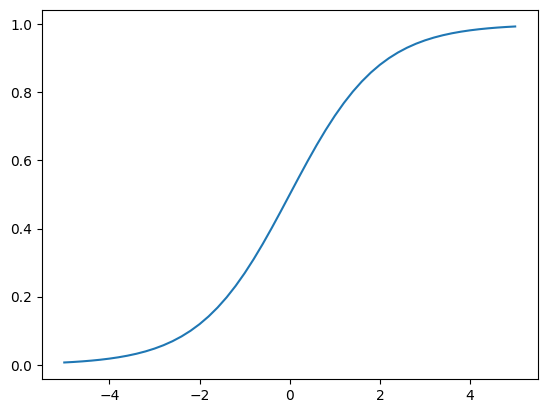

In [244]:

plt.plot(z, sigmoid(z))

In [245]:
X_train.shape , y_train.shape

((4225, 45), (4225,))

In [246]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

/home/abdallah_youssef/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [247]:
model.coef_[0].round(3)

array([ 0.477, -0.182, -0.431, -0.028, -0.107,  0.033, -0.098, -0.07 ,
       -0.03 , -0.105, -0.363,  0.325, -0.098,  0.004, -0.199,  0.097,
       -0.034,  0.116, -0.098, -0.153,  0.162, -0.098, -0.199, -0.262,
        0.127, -0.124, -0.012,  0.063, -0.289,  0.208, -0.117,  0.097,
       -0.232,  0.173, -0.124, -0.098,  0.087, -0.117, -0.098,  0.08 ,
        0.256, -0.098, -0.294, -0.061,  0.   ])

In [248]:
model.intercept_

array([-0.13699704])

In [249]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.38695397, 0.13651612, 0.22566388, ..., 0.47007634, 0.27525631,
       0.45517783])

In [250]:
churn_decision = (y_pred >= 0.5).astype(int)

In [251]:
(y_val == churn_decision).mean()

0.8225691980127751

In [252]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision
df_pred['actual'] = y_val

In [253]:
df_pred['correct'] = (y_val == churn_decision)
df_pred.correct.mean()

0.8225691980127751

In [254]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.477,
 'contract=one_year': -0.182,
 'contract=two_year': -0.431,
 'dependents=no': -0.028,
 'dependents=yes': -0.107,
 'deviceprotection=no': 0.033,
 'deviceprotection=no_internet_service': -0.098,
 'deviceprotection=yes': -0.07,
 'gender=female': -0.03,
 'gender=male': -0.105,
 'internetservice=dsl': -0.363,
 'internetservice=fiber_optic': 0.325,
 'internetservice=no': -0.098,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.199,
 'multiplelines=no_phone_service': 0.097,
 'multiplelines=yes': -0.034,
 'onlinebackup=no': 0.116,
 'onlinebackup=no_internet_service': -0.098,
 'onlinebackup=yes': -0.153,
 'onlinesecurity=no': 0.162,
 'onlinesecurity=no_internet_service': -0.098,
 'onlinesecurity=yes': -0.199,
 'paperlessbilling=no': -0.262,
 'paperlessbilling=yes': 0.127,
 'partner=no': -0.124,
 'partner=yes': -0.012,
 'paymentmethod=bank_transfer_(automatic)': 0.063,
 'paymentmethod=credit_card_(automatic)': -0.289,
 'paymentmethod=electronic_check': 0.208,


In [255]:
small = ['contract','tenure','monthlycharges']

In [256]:
df_train[small]

,contract,tenure,monthlycharges
3526,month-to-month,5,50.35
6097,two_year,72,81.00
6793,two_year,72,108.40
4136,one_year,47,19.90
3557,month-to-month,33,59.45
...,...,...,...
1729,one_year,64,89.45
700,two_year,66,63.30
1568,month-to-month,11,111.40
5510,month-to-month,18,101.30


In [257]:
small_dicts = df_train[small].to_dict(orient='records')
small_train = dv.fit_transform(small_dicts)

In [258]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(small_train,y_train)

LogisticRegression()

In [259]:
lr.coef_[0].round(3)

array([ 1.04 , -0.033, -1.007,  0.028, -0.036])

In [260]:
lr.intercept_

array([-2.56887834])

In [262]:
df_val[small]

,contract,tenure,monthlycharges
559,month-to-month,1,49.30
4934,two_year,72,110.75
5141,month-to-month,5,19.25
3492,month-to-month,3,29.20
2507,two_year,71,24.50
...,...,...,...
6495,month-to-month,1,69.65
2645,month-to-month,1,19.80
4461,month-to-month,29,94.20
90,month-to-month,30,82.05


In [263]:
small_dicts_val = df_val[small].to_dict(orient='records')
small_dicts_val

[{'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 49.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 110.75},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 19.25},
 {'contract': 'month-to-month', 'tenure': 3, 'monthlycharges': 29.2},
 {'contract': 'two_year', 'tenure': 71, 'monthlycharges': 24.5},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 55.15},
 {'contract': 'one_year', 'tenure': 54, 'monthlycharges': 114.65},
 {'contract': 'one_year', 'tenure': 70, 'monthlycharges': 44.05},
 {'contract': 'month-to-month', 'tenure': 9, 'monthlycharges': 74.25},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 90.8},
 {'contract': 'two_year', 'tenure': 27, 'monthlycharges': 20.35},
 {'contract': 'two_year', 'tenure': 65, 'monthlycharges': 84.2},
 {'contract': 'one_year', 'tenure': 67, 'monthlycharges': 49.35},
 {'contract': 'month-to-month', 'tenure': 43, 'monthlycharges': 94.1},
 {'contract': 'one_year', 'tenure': 30, 'monthlyc

In [264]:
X_val_small = dv.fit_transform(small_dicts_val)

In [301]:
y_pred_small = lr.predict_proba(X_val_small)[:,1]
y_pred_small

array([0.45449792, 0.04473001, 0.23700356, ..., 0.5172287 , 0.42365769,
       0.29185211])

In [276]:
churn_decision_small = y_pred_small >= 0.5

In [303]:
(churn_decision_small == y_val).mean()

0.7998580553584103

In [304]:
lr.intercept_

array([-2.56887834])

In [305]:
dict(zip(dv.get_feature_names_out(),lr.coef_[0].round(3)))

{'contract=month-to-month': 1.04,
 'contract=one_year': -0.033,
 'contract=two_year': -1.007,
 'monthlycharges': 0.028,
 'tenure': -0.036}

In [311]:
-2.56887834 + 1.04+50*0.028+1*-0.036

-0.16487833999999976

In [312]:
sigmoid(_)

0.4588735409246088

In [300]:
churn_decision_small[0]
y_val[0]

0

In [293]:
y_val[0] , y_pred_small[0]

(0, 0.45449792080877277)

In [288]:
sigmoid(_)

0.9931244090088412